In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')


In [4]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

<AxesSubplot:title={'center':'Height (inch.) distribution'}, ylabel='Frequency'>

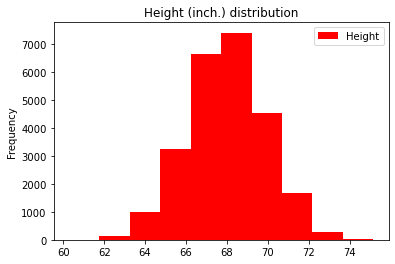

In [5]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

In [6]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


<AxesSubplot:title={'center':'Weight distribution'}, ylabel='Frequency'>

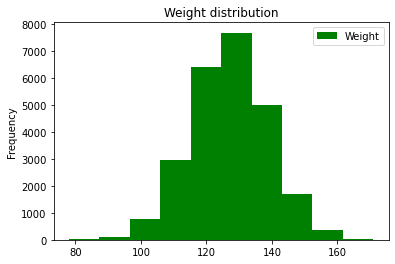

In [7]:
data.plot(y='Weight', kind='hist', color='green', title='Weight distribution')

In [8]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) /            (height_inch / METER_TO_INCH) ** 2

In [9]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)


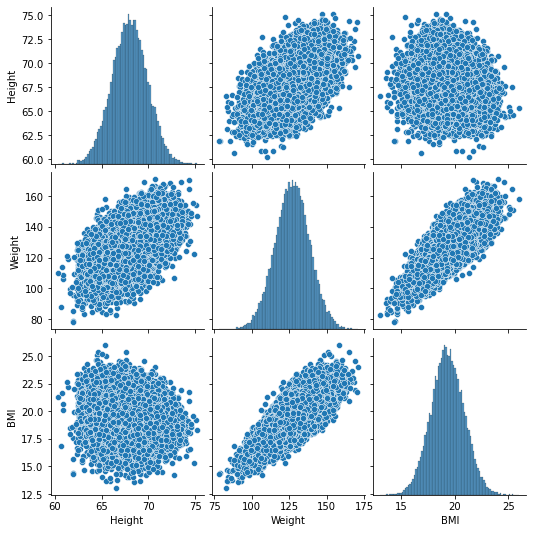

In [10]:
sns.pairplot(data)

In [11]:
def weight_category(weight):
    pass
    # Ваш код здесь
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2
    

data['weight_cat'] = data['Weight'].apply(weight_category)

Text(0, 0.5, 'Рост')

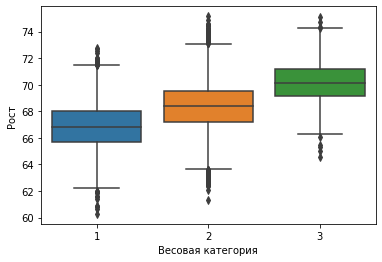

In [12]:
ax = sns.boxplot(x='weight_cat', y='Height', data=data)
ax.set_xlabel('Весовая категория')
ax.set_ylabel('Рост')

Text(0.5, 1.0, 'Зависимости роста от веса')

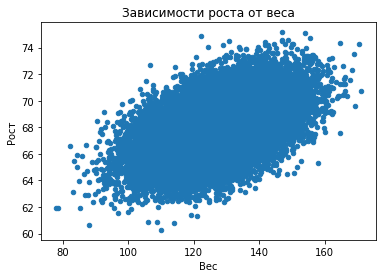

In [13]:
ax = data.plot(x='Weight', y='Height', kind='scatter')
ax.set_xlabel('Вес')
ax.set_ylabel('Рост')
ax.set_title('Зависимости роста от веса')

In [14]:
def error(data, w0, w1):
    error1 = (data.Height-(w0 + w1 * data.Weight))**2
    return(np.sum(error1))  


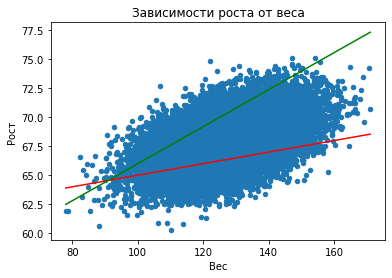

In [15]:
ax = data.plot(x='Weight', y='Height', kind='scatter')
ax.set_xlabel('Вес')
ax.set_ylabel('Рост')
ax.set_title('Зависимости роста от веса')
x = np.linspace(np.amin(data.Weight),np.amax(data.Weight), num=len(data))
y = 60 + 0.05 * x
y1 = 50 + 0.16 * x
plt.plot(x,y, color='red')
plt.plot(x,y1, color='green')

In [16]:
w1 = np.linspace(-5,5,num=100)
i = 0
errors = []
while i < len(w1):
    er = error(data,50,w1[i])
    errors.append(er)
    i = i + 1;

Text(0, 0.5, 'error(w0,w1)')

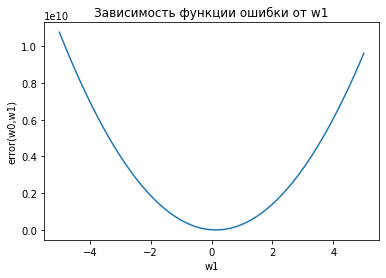

In [17]:
plt.plot(w1, errors)
plt.title('Зависимость функции ошибки от w1')
plt.xlabel('w1')
plt.ylabel('error(w0,w1)')

In [18]:
from scipy.optimize import minimize_scalar
res = minimize_scalar(lambda w1: error(data, 50, w1), bounds=(-5, 5))
res.x


0.1410920372883438

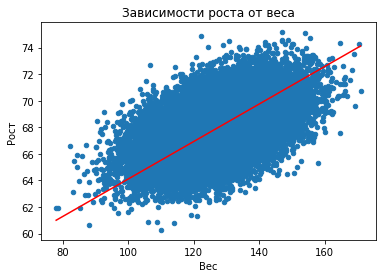

In [19]:
ax = data.plot(x='Weight', y='Height', kind='scatter')
ax.set_xlabel('Вес')
ax.set_ylabel('Рост')
ax.set_title('Зависимости роста от веса')
x = np.linspace(np.amin(data.Weight),np.amax(data.Weight), num=len(data))
y = 50 + res.x * x
plt.plot(x,y, color='red')

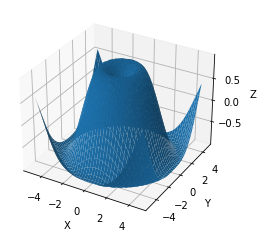

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


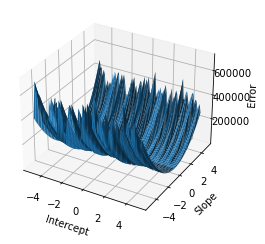

In [22]:
myfig = plt.figure()
myax = myfig.gca(projection='3d')
w1 = np.linspace(-5,5,num=100)
w0 = w1
w0, w1 = np.meshgrid(w0, w1)
error = (np.resize(data.Height[:len(w1)],(1,len(w1)))-(w0 + w1 * np.resize(data.Weight[:len(w1)],(1,len(w1)))))**2
surf = myax.plot_surface(w0, w1, error)
myax.set_xlabel('Intercept')
myax.set_ylabel('Slope')
myax.set_zlabel('Error')
plt.show()

In [28]:
def error1(w):
    s=0.
    x=data['Weight']
    y=data['Height']
    for i in range(1,len(data.index)):
     s+=(y[i]-w[0]-w[1]*x[i])**2
    return s

import scipy.optimize as optimize
min = optimize.minimize(error1, np.array([0,0]), method = 'L-BFGS-B', bounds=((-100,100),(-5, 5)))

min.x, min.fun

(array([57.5715901 ,  0.08200762]), 67544.1520540156)

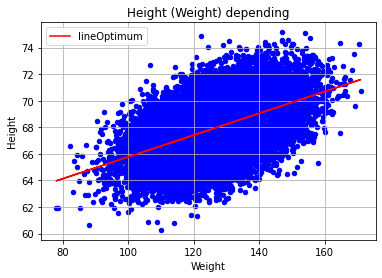

In [29]:
x=np.array(data['Weight'])

w0,w1=min.x
y = [w0+t*w1 for t in x]

data.plot(y='Height',x='Weight', kind='scatter', 
           color='blue',  title='Height (Weight) depending')

plt.plot(x, y, color="red", label="lineOptimum")

plt.grid(True)
plt.legend(loc='upper left')
